In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data preprocessing

In [ ]:
import os
import numpy as np
from PIL import Image
import pandas as pd

In [ ]:
label_mapping = {
    'akiec': 0,
    'bcc': 1,
    'bkl': 2,
    'df': 3,
    'mel': 6,
    'vasc': 5
}

In [ ]:
image_folder = '/content/drive/MyDrive/Skin HAM10000/Synthetic_Images'

In [ ]:


import os

def list_subfolders(folder_path):
  """Lists the subfolders within a given folder path."""
  subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
  return subfolders

# List the first 5 subfolders in the image_folder
subfolders = list_subfolders(image_folder)
print("First 5 subfolders:")
for i in range(min(5, len(subfolders))):
  print(subfolders[i])


First 5 subfolders:
/content/drive/MyDrive/Skin HAM10000/Synthetic_Images/bkl
/content/drive/MyDrive/Skin HAM10000/Synthetic_Images/df
/content/drive/MyDrive/Skin HAM10000/Synthetic_Images/mel
/content/drive/MyDrive/Skin HAM10000/Synthetic_Images/vasc
/content/drive/MyDrive/Skin HAM10000/Synthetic_Images/bcc


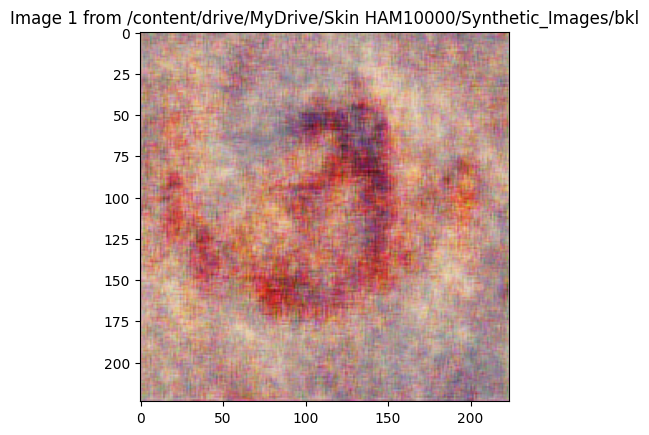

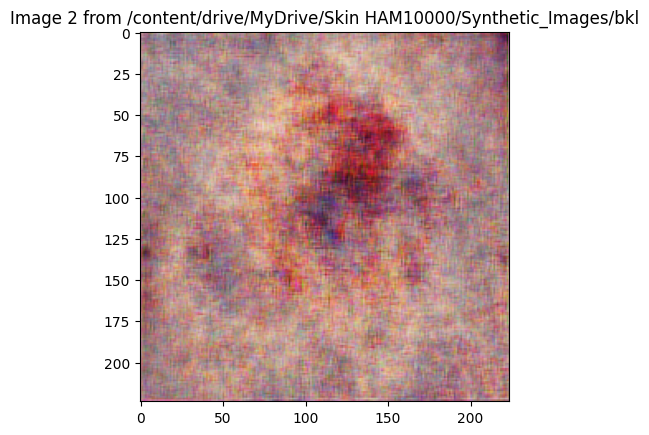

In [ ]:


import matplotlib.pyplot as plt

def display_images_from_folder(folder_path, num_images=5):
  """Displays a specified number of images from a given folder."""
  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
  for i in range(min(num_images, len(image_files))):
    image_path = os.path.join(folder_path, image_files[i])
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Image {i+1} from {folder_path}")
    plt.show()



if subfolders:
  # Display 2 images from the first subfolder
  display_images_from_folder(subfolders[0], num_images=2)


In [ ]:
output_csv = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'

In [ ]:

import pandas as pd
try:
  df = pd.read_csv(output_csv)
  print(df)
except FileNotFoundError:
  print(f"The file '{output_csv}' was not found.")


The file '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv' was not found.


In [ ]:
image_folder = '/content/drive/MyDrive/Skin HAM10000/Synthetic_Images'
output_csv = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'

In [ ]:
def image_to_pixels(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))
    img = np.array(img)
    if img.shape == (28, 28, 3):
        img_flatten = img.flatten()
        return img_flatten
    else:
        return None

In [ ]:
data = []
for label_name, label_num in label_mapping.items():
    folder_path = os.path.join(image_folder, label_name)

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        pixels = image_to_pixels(file_path)
        if pixels is not None:
            data.append(list(pixels) + [label_num])

In [ ]:
pixel_columns = [f'pixel{str(i).zfill(4)}' for i in range(28*28*3)]
df = pd.DataFrame(data, columns=pixel_columns + ['label'])

In [ ]:
df

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            190        162        151        201        178        162   
1            199        177        165        198        183        168   
2            229        219        197        235        226        204   
3            182        164        161        185        169        163   
4            214        201        182        204        194        178   
...          ...        ...        ...        ...        ...        ...   
37049          6          1          8         13          3         17   
37050         74         56         96         87         72        106   
37051        139        124        137        130        118        132   
37052        120         89        114        156        134        142   
37053         35         11         33         51         22         53   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            212        188        166        222  ...        220        201   
1            204        184        171        199  ...        205        181   
2            232        223        202        235  ...        124         91   
3            178        164        161        185  ...        201        175   
4            205        193        175        213  ...        233        219   
...          ...        ...        ...        ...  ...        ...        ...   
37049         30         10         36         39  ...        131        103   
37050        115         90        115        108  ...        116         97   
37051        122        113        133        142  ...        163        121   
37052        183        163        160        181  ...        183        159   
37053         74         29         60         69  ...        142         96   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            176        224        205        182        222        206   
1            169        197        177        168        198        178   
2            114         85         44         74         44         16   
3            166        200        178        166        202        184   
4            193        227        215        192        226        214   
...          ...        ...        ...        ...        ...        ...   
37049        124        142        103        125        136         76   
37050        126        107         83        114         92         37   
37051        126        157        118        125        154        111   
37052        162        159        142        149        147        101   
37053        118        146         99        114        167         96   

       pixel2351  label  
0            183      0  
1            166      0  
2             42      0  
3            174      0  
4            190      0  
...          ...    ...  
37049         94      5  
37050         65      5  
37051        115      5  
37052        120      5  
37053         95      5  

[37054 rows x 2353 columns]

In [ ]:
df.to_csv(output_csv, index=False)

In [ ]:
df["label"].value_counts()

label
3    6590
5    6563
0    6378
1    6191
6    5726
2    5606
Name: count, dtype: int64

In [ ]:
difference = 134

if difference > 0:
    # Randomly sample 'difference' rows where label is 6
    drop_indices = df[df['label'] == 6].sample(n=difference, random_state=42).index

    # Drop these indices from the DataFrame
    df = df.drop(drop_indices)

# Verify the new value counts
print(df['label'].value_counts())

label
3    6590
5    6563
0    6378
1    6191
2    5606
6    5592
Name: count, dtype: int64


In [ ]:
df.to_csv(output_csv, index=False)

# Hybrid

In [ ]:
# import system libs
import os
import time
import shutil
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax, Adagrad, RMSprop, Adadelta, Nadam, Ftrl, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


## test set does not contain synthetic data

In [ ]:
data_dir = '/content/drive/MyDrive/Skin HAM10000/hmnist_28_28_RGB.csv'
data = pd.read_csv(data_dir)
data

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197        154        185        202  ...        173        124   
1            123         93        126        158  ...         60         39   
2            201        142        160        206  ...        167        129   
3            143        103        119        171  ...         44         26   
4            215        162        191        225  ...        209        166   
...          ...        ...        ...        ...  ...        ...        ...   
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
0            177      2  
1             27      2  
2            117      2  
3             15      2  
4             92      2  
...          ...    ...  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[10015 rows x 2353 columns]

In [ ]:
data["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [ ]:
imbalanced_train_data, test_data = train_test_split(data, test_size=0.25, random_state=49, stratify=data['label'])

In [ ]:
test_data["label"].value_counts()

label
4    1676
6     278
2     275
1     129
0      82
5      35
3      29
Name: count, dtype: int64

In [ ]:
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'

synthetic_df = pd.read_csv(synthetic_data_path)
train_data = pd.concat([imbalanced_train_data, synthetic_df], ignore_index=True)

In [ ]:
train_data["label"].value_counts()

label
3    6676
5    6670
0    6623
1    6576
2    6430
6    6427
4    5029
Name: count, dtype: int64

In [ ]:
y_train = train_data["label"]
X_train = train_data.drop(columns=["label"])
X_train = np.array(X_train).reshape(-1, 28, 28, 3)
print('Shape of Data :', X_train.shape)

Shape of Data : (44431, 28, 28, 3)


In [ ]:
y_train = np.array(y_train)
y_train

array([4, 4, 2, ..., 5, 5, 5])

In [ ]:
y_test = test_data["label"]
X_test = test_data.drop(columns=["label"])
X_test = np.array(X_test).reshape(-1, 28, 28, 3)
print('Shape of Data :', X_test.shape)

Shape of Data : (2504, 28, 28, 3)


In [ ]:
y_test = np.array(y_test)
y_test

array([4, 4, 4, ..., 4, 4, 1])

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# prompt: print some y_train and y_test values

print("Some y_train values:")
print(y_train[:5])

print("\nSome y_test values:")
print(y_test[:5])


Some y_train values:
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]

Some y_test values:
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.0005)

In [ ]:
from keras.optimizers import AdamW
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_119 (Conv2D)                  │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_119              │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_120 (Conv2D)                  │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_120              │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_122 (Conv2D)                  │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_123 (Conv2D)                  │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_121              │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_124 (Conv2D)                  │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_125 (Conv2D)                  │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_122              │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,275,079 (4.86 MB)

 Trainable params: 1,273,671 (4.86 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit model with data augmentation
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))

# Block 1
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# Block 2
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# Block 3
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# Block 4
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

# Flatten
model.add(keras.layers.Flatten())

# Fully connected layers
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L2(0.01)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

# Output layer
model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Fit the model using data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,  # Increase epochs for better convergence
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    callbacks=[learning_rate_reduction])

# Print model summary
model.summary()


Epoch 1/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.4481 - loss: 12.6674 - val_accuracy: 0.6410 - val_loss: 4.3984 - learning_rate: 0.0010
Epoch 2/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.8075 - loss: 2.8379 - val_accuracy: 0.6753 - val_loss: 1.5186 - learning_rate: 0.0010
Epoch 3/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8795 - loss: 0.7799 - val_accuracy: 0.6769 - val_loss: 1.0467 - learning_rate: 0.0010
Epoch 4/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9018 - loss: 0.4250 - val_accuracy: 0.6853 - val_loss: 0.9294 - learning_rate: 0.0010
Epoch 5/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9146 - loss: 0.3407 - val_accuracy: 0.6981 - val_loss: 0.8851 - learning_rate: 0.0010
Epoch 6/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9192 - loss: 0.2963 - val_accuracy: 0.6933 - val_loss: 0.8859 - learning_rate: 0.0010
Epoch 7/50
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accur

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_183 (Conv2D)                  │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_161              │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_184 (Conv2D)                  │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_185 (Conv2D)                  │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_99 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_162              │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_186 (Conv2D)                  │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_187 (Conv2D)                  │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_188 (Conv2D)                  │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_100 (MaxPooling2D)     │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_163              │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_189 (Conv2D)                  │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_190 (Conv2D)                  │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_191 (Conv2D)                  │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_101 (MaxPooling2D)     │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_164              │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_25 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,603,159 (25.19 MB)

 Trainable params: 2,200,135 (8.39 MB)

 Non-trainable params: 2,752 (10.75 KB)

 Optimizer params: 4,400,272 (16.79 MB)

In [ ]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=32,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.7695 - loss: 11.4791 - val_accuracy: 0.6841 - val_loss: 3.2598 - learning_rate: 0.0010
Epoch 2/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9352 - loss: 1.7851 - val_accuracy: 0.6885 - val_loss: 1.2696 - learning_rate: 0.0010
Epoch 3/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9421 - loss: 0.4713 - val_accuracy: 0.7145 - val_loss: 0.8974 - learning_rate: 0.0010
Epoch 4/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9464 - loss: 0.2527 - val_accuracy: 0.7224 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 5/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9528 - loss: 0.1878 - val_accuracy: 0.7304 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 6/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9577 - loss: 0.1681 - val_accuracy: 0.7224 - val_loss: 0.7912 - learning_rate: 0.0010
Epoch 7/25
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0

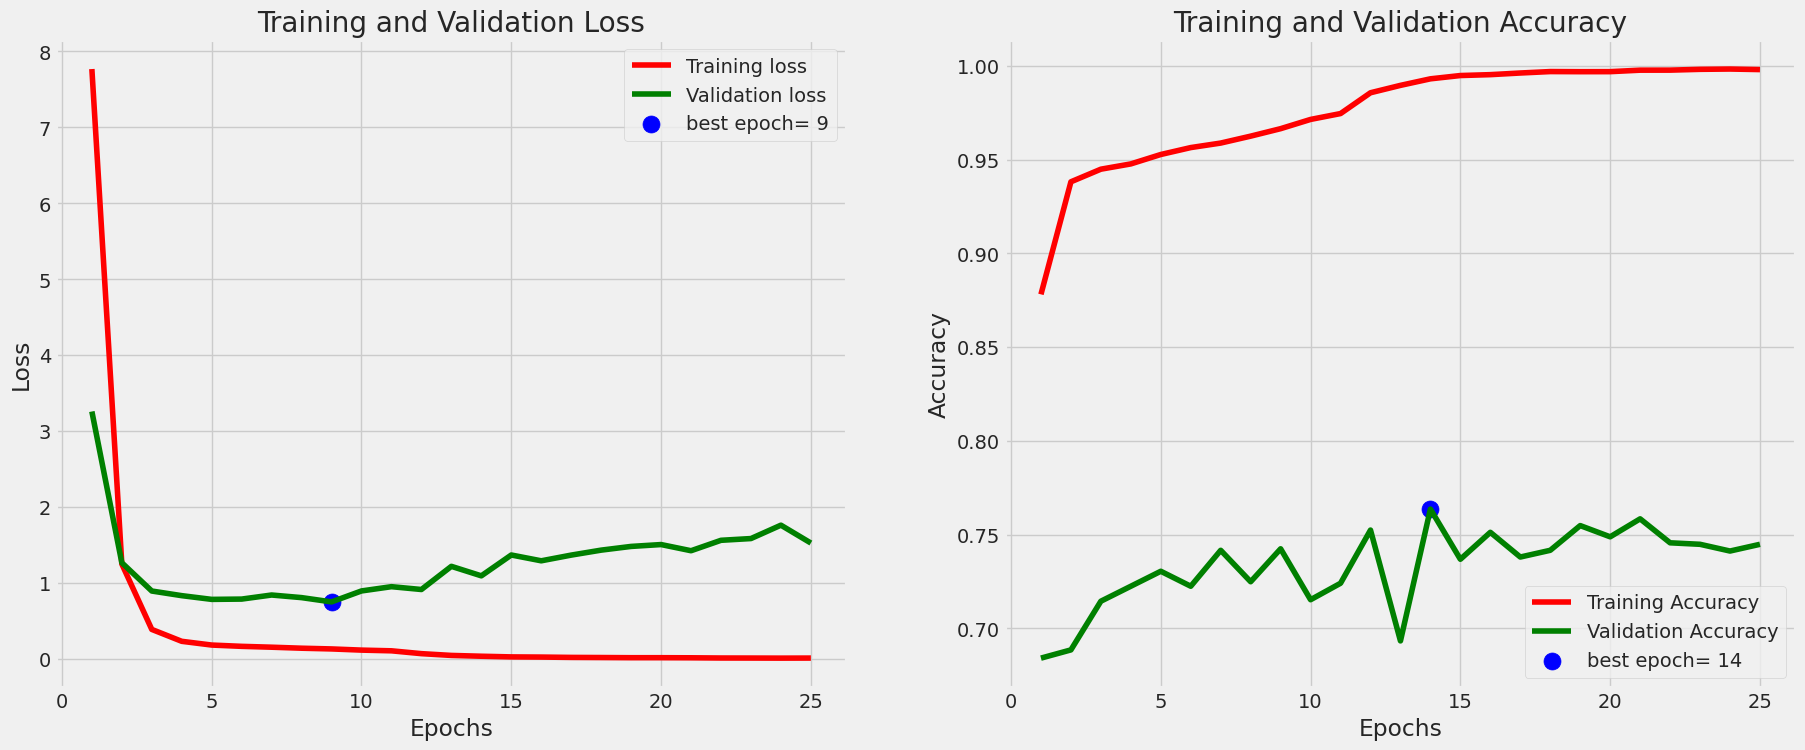

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


plot_training(history)

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1389/1389 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9979 - loss: 0.0174
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 1.5221
Train Loss:  0.011326869018375874
Train Accuracy:  0.9992122650146484
--------------------
Test Loss:  1.5288159847259521
Test Accuracy:  0.7448083162307739


In [ ]:
model.save('/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_1.h5')

In [ ]:
from tensorflow import keras
from keras.models import load_model
cnn_model = load_model('/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_1.h5')

In [ ]:
import joblib
joblib.dump(cnn_model, '/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_1.joblib')
loaded_cnn_model = joblib.load('/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_1.joblib')

In [ ]:
X_train_features = loaded_cnn_model.predict(X_train)
X_test_features = loaded_cnn_model.predict(X_test)

In [ ]:
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

In [ ]:
X_train_features_flat.shape
X_test_features_flat.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train_features_flat, y_train)

In [ ]:
# Make predictions using the trained Random Forest classifier
y_pred = rf_classifier.predict(X_test_features_flat)

In [ ]:
y_pred.shape

In [ ]:
y_true = np.array(y_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_true = np.argmax(y_true,axis=1)

In [ ]:
print(y_pred.shape, y_true.shape)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

In [ ]:
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_pred, labels=classes_labels)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

mcc = matthews_corrcoef(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("Matthews Correlation Coefficient:", mcc)
print("Cohen's Kappa:", kappa)

## Test set contains synthetic data

In [ ]:
real_data_path = '/content/drive/MyDrive/Skin HAM10000/hmnist_28_28_RGB.csv'
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/synthetic_images_pixel_values.csv'

In [ ]:
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

In [ ]:
real_df["label"].value_counts()

In [ ]:
data = pd.concat([real_df, synthetic_df], ignore_index=True)

In [ ]:
data

In [ ]:
Label = data["label"]
Data = data.drop(columns=["label"])
data["label"].value_counts()

In [ ]:
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

In [ ]:
Label = np.array(Label)
Label

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25, random_state = 49)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [ ]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2()))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(X_test , y_test),
                    callbacks=[learning_rate_reduction])

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


plot_training(history)

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

In [ ]:
model.save('/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_2.h5')

In [ ]:
from tensorflow import keras
from keras.models import load_model
cnn_model = load_model('/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_2.h5')

In [ ]:
import joblib
joblib.dump(cnn_model, '/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_2.joblib')

In [ ]:
loaded_cnn_model = joblib.load('/content/drive/MyDrive/Skin HAM10000/output/gan_hybrid_model_2.joblib')

In [ ]:
X_train_features = loaded_cnn_model.predict(X_train)
X_test_features = loaded_cnn_model.predict(X_test)

In [ ]:
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

In [ ]:
X_train_features_flat.shape
X_test_features_flat.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train_features_flat, y_train)

In [ ]:
# Make predictions using the trained Random Forest classifier
y_pred = rf_classifier.predict(X_test_features_flat)

In [ ]:
y_pred.shape

In [ ]:
y_true = np.array(y_test)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_true = np.argmax(y_true,axis=1)

In [ ]:
print(y_pred.shape, y_true.shape)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

In [ ]:
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_pred, labels=classes_labels)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

mcc = matthews_corrcoef(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)

print("Matthews Correlation Coefficient:", mcc)
print("Cohen's Kappa:", kappa)

# Another way

In [2]:
pip install tensorflow keras numpy pandas matplotlib scikit-learn joblib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Add, Multiply, Concatenate, Reshape, Lambda,
    GlobalAveragePooling2D, GlobalMaxPooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import datetime
import os


In [ ]:
# Define the CBAM class for integrating channel and spatial attention
class CBAM(tf.keras.layers.Layer):
    def __init__(self, reduction_ratio=16, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channel = input_shape[-1]

        # Channel Attention components
        self.shared_dense_one = Dense(channel // self.reduction_ratio,
                                      activation='relu',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')
        self.shared_dense_two = Dense(channel,
                                      activation='sigmoid',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')

        # Spatial Attention components
        self.conv_spatial = Conv2D(filters=1,
                                   kernel_size=7,
                                   strides=1,
                                   padding='same',
                                   activation='sigmoid',
                                   kernel_initializer='he_normal',
                                   use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, inputs):
        # ----- Channel Attention -----
        # Average Pooling
        channel_avg = GlobalAveragePooling2D()(inputs)
        channel_avg = Reshape((1, 1, inputs.shape[-1]))(channel_avg)

        # Max Pooling
        channel_max = GlobalMaxPooling2D()(inputs)
        channel_max = Reshape((1, 1, inputs.shape[-1]))(channel_max)

        # Shared MLP Network
        avg_out = self.shared_dense_two(self.shared_dense_one(channel_avg))
        max_out = self.shared_dense_two(self.shared_dense_one(channel_max))

        # Combined Channel Attention
        channel_attention = Add()([avg_out, max_out])
        channel_attention = Multiply()([inputs, channel_attention])

        # ----- Spatial Attention -----
        # Average Pooling across channels
        spatial_avg = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(channel_attention)

        # Max Pooling across channels
        spatial_max = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(channel_attention)

        # Concatenate
        spatial_concat = Concatenate(axis=3)([spatial_avg, spatial_max])

        # Spatial Attention
        spatial_attention = self.conv_spatial(spatial_concat)
        spatial_attention = Multiply()([channel_attention, spatial_attention])

        return spatial_attention

    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define paths to your datasets
real_data_path = '/content/drive/MyDrive/Skin HAM10000/hmnist_28_28_RGB.csv'  # Update this path
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'  # Update this path

# Load datasets
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

# Combine datasets
data = pd.concat([real_df, synthetic_df], ignore_index=True)

# Separate labels and features
Label = data["label"]
Data = data.drop(columns=["label"])

# Convert to NumPy arrays and reshape
# Assuming each row represents a flattened 28x28 RGB image
Data = Data.values.reshape(-1, 28, 28, 3).astype('float32') / 255.0  # Normalize to [0, 1]

# Encode labels to integers
le = LabelEncoder()
Label_encoded = le.fit_transform(Label)

# One-hot encode labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(Label_encoded, num_classes=7)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.25, random_state=49, stratify=Label_encoded
)

# Print to verify shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training set shape: (35100, 28, 28, 3), Training labels shape: (35100, 7)
Testing set shape: (11701, 28, 28, 3), Testing labels shape: (11701, 7)


In [ ]:
# Define class mapping (ensure consistency with labels in your dataset)
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

# Define the input shape (same as the images' shape)
input_shape = (28, 28, 3)
num_classes = y_train.shape[1]  # Number of classes

# Define the CNN model architecture
inputs = Input(shape=input_shape)

# Convolutional Layer 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)

# Convolutional Layer 2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional Layer 3
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Apply CBAM Attention Mechanism
x = CBAM()(x)

# Flatten the feature map and add Dense Layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Output Layer
predictions = Dense(num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cbam (CBAM)                          │ (None, 3, 3, 128)           │           2,282 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,825 (983.69 KB)

 Trainable params: 251,825 (983.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define callbacks for early stopping, model checkpointing, etc.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras'  # Update this path as needed

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1
)

# Combine all callbacks
callbacks = [early_stopping, checkpoint, reduce_lr, tensorboard]


In [ ]:
# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)


In [ ]:
# Define batch size and number of epochs
batch_size = 32
epochs = 50  # The model will likely stop earlier due to EarlyStopping

# Calculate steps per epoch
steps_per_epoch = len(X_train) // batch_size

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1092/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2373 - loss: 1.7933
Epoch 1: val_accuracy improved from -inf to 0.51910, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.2377 - loss: 1.7926 - val_accuracy: 0.5191 - val_loss: 1.2182 - learning_rate: 0.0010
Epoch 2/50
   1/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3750 - loss: 1.5142

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.51910 to 0.52491, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.3750 - loss: 1.5142 - val_accuracy: 0.5249 - val_loss: 1.2154 - learning_rate: 0.0010
Epoch 3/50
1094/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5126 - loss: 1.2400
Epoch 3: val_accuracy improved from 0.52491 to 0.66969, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.5126 - loss: 1.2398 - val_accuracy: 0.6697 - val_loss: 0.8572 - learning_rate: 0.0010
Epoch 4/50
   1/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6250 - loss: 0.9348
Epoch 4: val_accuracy did not improve from 0.66969
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.6250 - loss: 0.9348 - val_accuracy: 0.6671 - val_loss: 0.8694 - learning_rate: 0.0010
Epoch 5/50
1090/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/st

In [ ]:


print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (35100, 7, 2)
y_test shape: (11701, 7, 2)


In [ ]:
# Load the best saved model
loaded_cnn_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)

# Evaluate on training data
train_score = loaded_cnn_model.evaluate(X_train, y_train, verbose=1)
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")

print('-' * 30)

# Evaluate on testing data
test_score = loaded_cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8715 - loss: 0.3401
Train Loss: 0.3372
Train Accuracy: 87.32%
------------------------------
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3708
Test Loss: 0.3737
Test Accuracy: 86.03%


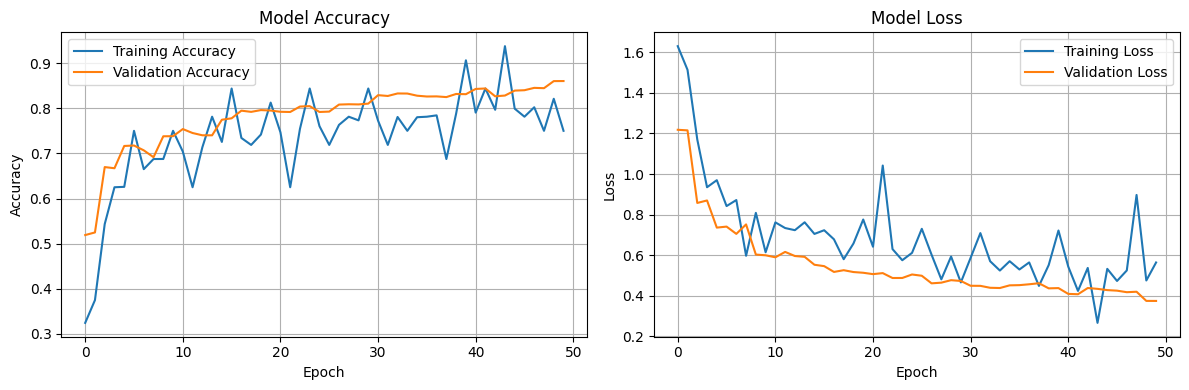

In [ ]:
# Plot training & validation accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Loss
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:


import numpy as np



y_pred = loaded_cnn_model.predict(X_test)

# Convert predicted probabilities to class labels (using argmax)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Display some predictions along with the actual labels
num_samples_to_display = 10  # You can change this number

for i in range(num_samples_to_display):
  print(f"Sample {i+1}:")
  print(f"  True Label: {y_true_labels[i]} ({list(classes.values())[y_true_labels[i]][0]})")
  print(f"  Predicted Label: {y_pred_labels[i]} ({list(classes.values())[y_pred_labels[i]][0]})")



366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Sample 1:
  True Label: 4 (nv)
  Predicted Label: 4 (nv)
Sample 2:
  True Label: 1 (bcc)
  Predicted Label: 1 (bcc)
Sample 3:
  True Label: 3 (df)
  Predicted Label: 3 (df)
Sample 4:
  True Label: 1 (bcc)
  Predicted Label: 1 (bcc)
Sample 5:
  True Label: 0 (akiec)
  Predicted Label: 0 (akiec)
Sample 6:
  True Label: 6 (mel)
  Predicted Label: 6 (mel)
Sample 7:
  True Label: 1 (bcc)
  Predicted Label: 1 (bcc)
Sample 8:
  True Label: 5 (vasc)
  Predicted Label: 5 (vasc)
Sample 9:
  True Label: 3 (df)
  Predicted Label: 3 (df)
Sample 10:
  True Label: 4 (nv)
  Predicted Label: 4 (nv)


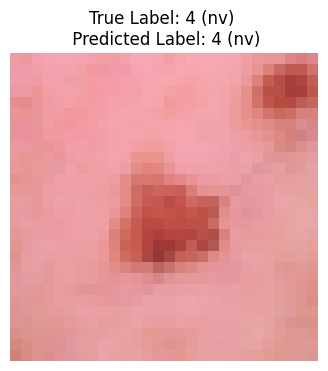

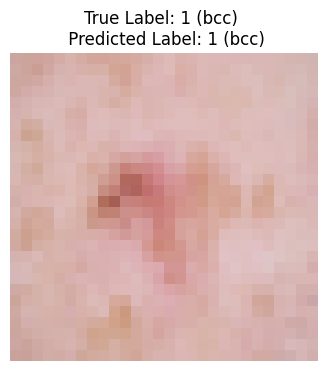

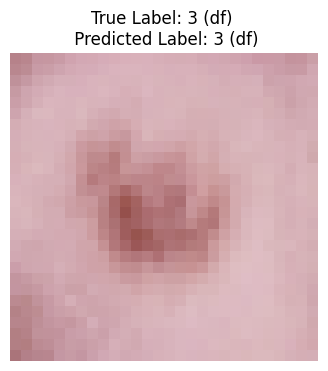

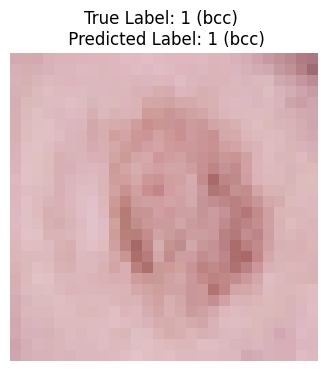

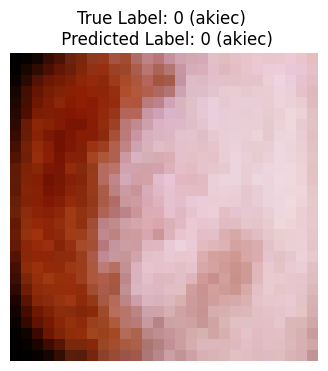

In [ ]:


import matplotlib.pyplot as plt



num_images_to_display = 5  

for i in range(num_images_to_display):
  plt.figure(figsize=(4, 4))
  plt.imshow(X_test[i])  
  plt.title(f"True Label: {y_true_labels[i]} ({list(classes.values())[y_true_labels[i]][0]}) \n Predicted Label: {y_pred_labels[i]} ({list(classes.values())[y_pred_labels[i]][0]})")
  plt.axis('off')
  plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Step 1: Create a feature extraction model using the CNN + CBAM model up to the feature layer
# Use the CNN layers up to before the Dense layers (excluding final classification layer)
feature_extraction_model = Model(inputs=model.input, outputs=model.get_layer(index=-7).output)

# Step 2: Extract features for training and testing data
X_train_features = feature_extraction_model.predict(X_train, verbose=1)
X_test_features = feature_extraction_model.predict(X_test, verbose=1)

# Flatten the features if required for Random Forest
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Step 3: Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Step 4: Train Random Forest on extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features_flat, y_train_int)

# Step 5: Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_features_flat)

# Step 6: Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test_int, y_pred_rf)
report_rf = classification_report(y_test_int, y_pred_rf, target_names=[classes[i][1] for i in sorted(classes)])

print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", report_rf)

# Step 7: Save the Random Forest model using joblib (optional)
rf_model_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/rf_model.joblib'
joblib.dump(rf_classifier, rf_model_path)
print(f"Random Forest model saved successfully at {rf_model_path}")


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Random Forest Classifier Accuracy: 0.9032
Random Forest Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.91      0.85      0.88      1677
                            Basal cell carcinoma       0.93      0.93      0.93      1676
                   Benign keratosis-like lesions       0.87      0.82      0.84      1677
                                  Dermatofibroma       0.95      0.97      0.96      1676
                                Melanocytic nevi       0.78      0.96      0.86      1676
              Pyogenic granulomas and hemorrhage       0.97      0.93      0.95      1676
                                        Melanoma       0.94      0.85      0.89      1643

                                        accuracy                           0.90     11701
                        

In [ ]:
# Define batch size and number of epochs
batch_size = 32
epochs = 100  # The model will likely stop earlier due to EarlyStopping

# Calculate steps per epoch
steps_per_epoch = len(X_train) // batch_size

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1092/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8259 - loss: 0.4622
Epoch 1: val_accuracy did not improve from 0.86027
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.8259 - loss: 0.4622 - val_accuracy: 0.8598 - val_loss: 0.3649 - learning_rate: 5.0000e-04
Epoch 2/100
   1/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7500 - loss: 0.3996

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.86027 to 0.86104, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.3996 - val_accuracy: 0.8610 - val_loss: 0.3613 - learning_rate: 5.0000e-04
Epoch 3/100
1089/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8243 - loss: 0.4696
Epoch 3: val_accuracy improved from 0.86104 to 0.86950, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8244 - loss: 0.4695 - val_accuracy: 0.8695 - val_loss: 0.3511 - learning_rate: 5.0000e-04
Epoch 4/100
   1/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5938 - loss: 0.9757
Epoch 4: val_accuracy improved from 0.86950 to 0.87001, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.5938 - loss: 0.9757 - val_accuracy: 0.8

In [ ]:
# Load the best saved model
loaded_cnn_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)

# Evaluate on training data
train_score = loaded_cnn_model.evaluate(X_train, y_train, verbose=1)
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")

print('-' * 30)

# Evaluate on testing data
test_score = loaded_cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8974 - loss: 0.2746
Train Loss: 0.2725
Train Accuracy: 89.97%
------------------------------
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8845 - loss: 0.3093
Test Loss: 0.3146
Test Accuracy: 88.43%


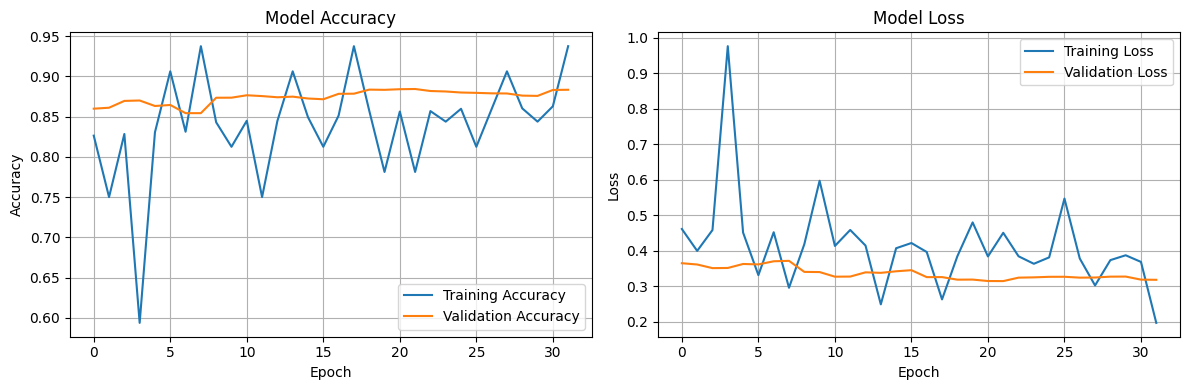

In [ ]:
# Plot training & validation accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

# Loss
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Step 1: Create a feature extraction model using the CNN + CBAM model up to the feature layer
# Use the CNN layers up to before the Dense layers (excluding final classification layer)
feature_extraction_model = Model(inputs=model.input, outputs=model.get_layer(index=-7).output)

# Step 2: Extract features for training and testing data
X_train_features = feature_extraction_model.predict(X_train, verbose=1)
X_test_features = feature_extraction_model.predict(X_test, verbose=1)

# Flatten the features if required for Random Forest
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Step 3: Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Step 4: Train Random Forest on extracted features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features_flat, y_train_int)

# Step 5: Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_features_flat)

# Step 6: Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test_int, y_pred_rf)
report_rf = classification_report(y_test_int, y_pred_rf, target_names=[classes[i][1] for i in sorted(classes)])

print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", report_rf)

# Step 7: Save the Random Forest model using joblib (optional)
rf_model_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/rf_model.joblib'
joblib.dump(rf_classifier, rf_model_path)
print(f"Random Forest model saved successfully at {rf_model_path}")


1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Random Forest Classifier Accuracy: 0.9068
Random Forest Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.91      0.87      0.89      1677
                            Basal cell carcinoma       0.94      0.94      0.94      1676
                   Benign keratosis-like lesions       0.88      0.82      0.85      1677
                                  Dermatofibroma       0.96      0.98      0.97      1676
                                Melanocytic nevi       0.78      0.96      0.86      1676
              Pyogenic granulomas and hemorrhage       0.97      0.93      0.95      1676
                                        Melanoma       0.94      0.85      0.89      1643

                                        accuracy                           0.91     11701
                        

In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Add, Multiply, Concatenate, Reshape, Lambda,
    GlobalAveragePooling2D, GlobalMaxPooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the CBAM class for integrating channel and spatial attention
class CBAM(tf.keras.layers.Layer):
    def __init__(self, reduction_ratio=16, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channel = input_shape[-1]

        # Channel Attention components
        self.shared_dense_one = Dense(channel // self.reduction_ratio,
                                      activation='relu',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')
        self.shared_dense_two = Dense(channel,
                                      activation='sigmoid',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')

        # Spatial Attention components
        self.conv_spatial = Conv2D(filters=1,
                                   kernel_size=7,
                                   strides=1,
                                   padding='same',
                                   activation='sigmoid',
                                   kernel_initializer='he_normal',
                                   use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, inputs):
        # ----- Channel Attention -----
        # Average Pooling
        channel_avg = GlobalAveragePooling2D()(inputs)
        channel_avg = Reshape((1, 1, inputs.shape[-1]))(channel_avg)

        # Max Pooling
        channel_max = GlobalMaxPooling2D()(inputs)
        channel_max = Reshape((1, 1, inputs.shape[-1]))(channel_max)

        # Shared MLP Network
        avg_out = self.shared_dense_two(self.shared_dense_one(channel_avg))
        max_out = self.shared_dense_two(self.shared_dense_one(channel_max))

        # Combined Channel Attention
        channel_attention = Add()([avg_out, max_out])
        channel_attention = Multiply()([inputs, channel_attention])

        # ----- Spatial Attention -----
        # Average Pooling across channels
        spatial_avg = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(channel_attention)

        # Max Pooling across channels
        spatial_max = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(channel_attention)

        # Concatenate
        spatial_concat = Concatenate(axis=3)([spatial_avg, spatial_max])

        # Spatial Attention
        spatial_attention = self.conv_spatial(spatial_concat)
        spatial_attention = Multiply()([channel_attention, spatial_attention])

        return spatial_attention

    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config

from sklearn.preprocessing import LabelEncoder

# Define paths to your datasets
real_data_path = '/content/drive/MyDrive/Skin HAM10000/hmnist_28_28_RGB.csv'  # Update this path
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'  # Update this path

# Load datasets
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

# Combine datasets
data = pd.concat([real_df, synthetic_df], ignore_index=True)

# Separate labels and features
Label = data["label"]
Data = data.drop(columns=["label"])

# Convert to NumPy arrays and reshape
# Assuming each row represents a flattened 28x28 RGB image
Data = Data.values.reshape(-1, 28, 28, 3).astype('float32') / 255.0  # Normalize to [0, 1]

# Encode labels to integers
le = LabelEncoder()
Label_encoded = le.fit_transform(Label)

# One-hot encode labels
y = to_categorical(Label_encoded, num_classes=7)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.25, random_state=49, stratify=Label_encoded
)

# Print to verify shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Define class mapping (ensure consistency with labels in your dataset)
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

# Define the input shape (same as the images' shape)
input_shape = (28, 28, 3)
num_classes = y_train.shape[1]  # Number of classes

# Define the CNN model architecture
inputs = Input(shape=input_shape)
















# Convolutional Layer 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)

# Convolutional Layer 2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional Layer 3
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Apply CBAM Attention Mechanism
x = CBAM()(x)

# Flatten the feature map and add Dense Layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Output Layer
predictions = Dense(num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks for model checkpointing, learning rate reduction, and TensorBoard
# Note: EarlyStopping has been removed as per your request

checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch.keras'  # Update this path as needed

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1
)

# Combine all callbacks (EarlyStopping removed)
callbacks = [checkpoint, reduce_lr, tensorboard]

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Define batch size and number of epochs
batch_size = 32
epochs = 100  # Increased to 100 epochs

# Calculate steps per epoch
steps_per_epoch = len(X_train) // batch_size

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)



Training set shape: (35100, 28, 28, 3), Training labels shape: (35100, 7)
Testing set shape: (11701, 28, 28, 3), Testing labels shape: (11701, 7)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cbam_1 (CBAM)                        │ (None, 3, 3, 128)           │           2,282 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,825 (983.69 KB)

 Trainable params: 251,825 (983.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1090/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2336 - loss: 1.8033
Epoch 1: val_accuracy improved from -inf to 0.58952, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.2342 - loss: 1.8021 - val_accuracy: 0.5895 - val_loss: 1.1285 - learning_rate: 0.0010
Epoch 2/100
   1/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5000 - loss: 1.2529

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.58952 to 0.59038, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5000 - loss: 1.2529 - val_accuracy: 0.5904 - val_loss: 1.1234 - learning_rate: 0.0010
Epoch 3/100
1093/1096 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5212 - loss: 1.2118
Epoch 3: val_accuracy improved from 0.59038 to 0.65618, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.5213 - loss: 1.2116 - val_accuracy: 0.6562 - val_loss: 0.8466 - learning_rate: 0.0010
Epoch 4/100
   1/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6875 - loss: 0.9450
Epoch 4: val_accuracy improved from 0.65618 to 0.65721, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch.keras
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6875 - loss: 0.9450 - 

# **another way**

In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Add, Multiply, Concatenate, Reshape, Lambda,
    GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Define the CBAM class for integrating channel and spatial attention
class CBAM(tf.keras.layers.Layer):
    def __init__(self, reduction_ratio=16, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channel = input_shape[-1]

        # Channel Attention components
        self.shared_dense_one = Dense(channel // self.reduction_ratio,
                                      activation='relu',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')
        self.shared_dense_two = Dense(channel,
                                      activation='sigmoid',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')

        # Spatial Attention components
        self.conv_spatial = Conv2D(filters=1,
                                   kernel_size=7,
                                   strides=1,
                                   padding='same',
                                   activation='sigmoid',
                                   kernel_initializer='he_normal',
                                   use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, inputs):
        # ----- Channel Attention -----
        # Average Pooling
        channel_avg = GlobalAveragePooling2D()(inputs)
        channel_avg = Reshape((1, 1, inputs.shape[-1]))(channel_avg)

        # Max Pooling
        channel_max = GlobalMaxPooling2D()(inputs)
        channel_max = Reshape((1, 1, inputs.shape[-1]))(channel_max)

        # Shared MLP Network
        avg_out = self.shared_dense_two(self.shared_dense_one(channel_avg))
        max_out = self.shared_dense_two(self.shared_dense_one(channel_max))

        # Combined Channel Attention
        channel_attention = Add()([avg_out, max_out])
        channel_attention = Multiply()([inputs, channel_attention])

        # ----- Spatial Attention -----
        # Average Pooling across channels
        spatial_avg = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(channel_attention)

        # Max Pooling across channels
        spatial_max = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(channel_attention)

        # Concatenate
        spatial_concat = Concatenate(axis=3)([spatial_avg, spatial_max])

        # Spatial Attention
        spatial_attention = self.conv_spatial(spatial_concat)
        spatial_attention = Multiply()([channel_attention, spatial_attention])

        return spatial_attention

    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config

# Define paths to your datasets
real_data_path = '/content/drive/MyDrive/Skin HAM10000/hmnist_28_28_RGB.csv'  # Update this path
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'  # Update this path

# Load datasets
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

# Combine datasets
data = pd.concat([real_df, synthetic_df], ignore_index=True)

# Separate labels and features
Label = data["label"]
Data = data.drop(columns=["label"])

# Convert to NumPy arrays and reshape
# Assuming each row represents a flattened 28x28 RGB image
Data = Data.values.reshape(-1, 28, 28, 3).astype('float32') / 255.0  # Normalize to [0, 1]

# Encode labels to integers
le = LabelEncoder()
Label_encoded = le.fit_transform(Label)

# One-hot encode labels
y = to_categorical(Label_encoded, num_classes=7)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.25, random_state=49, stratify=Label_encoded
)

# Print to verify shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Define class mapping (ensure consistency with labels in your dataset)
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}

# Define the input shape (same as the images' shape)
input_shape = (28, 28, 3)
num_classes = y_train.shape[1]  # Number of classes

# Define the Sequential CNN model architecture with CBAM integrated
model = Sequential(name='CBAM_Sequential_Model')

# Input Layer
model.add(Input(shape=input_shape))

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(MaxPooling2D())

# Integrate CBAM after the last convolutional block
model.add(CBAM())

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L1L2()))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define callbacks for model checkpointing, learning rate reduction, and TensorBoard
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch_2nd.keras'  # Update this path as needed

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1
)

# Combine all callbacks (EarlyStopping removed)
callbacks = [checkpoint, reduce_lr, tensorboard]

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model with the data generator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=callbacks,
    verbose=1
)



Training set shape: (35100, 28, 28, 3), Training labels shape: (35100, 7)
Testing set shape: (11701, 28, 28, 3), Testing labels shape: (11701, 7)


Model: "CBAM_Sequential_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cbam_1 (CBAM)                        │ (None, 1, 1, 256)           │           8,562 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,283,641 (4.90 MB)

 Trainable params: 1,282,233 (4.89 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1096/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3498 - loss: 1.7012
Epoch 1: val_accuracy improved from -inf to 0.53226, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch_2nd.keras
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.3500 - loss: 1.7007 - val_accuracy: 0.5323 - val_loss: 1.2151 - learning_rate: 0.0010
Epoch 2/50
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5951 - loss: 1.0605
Epoch 2: val_accuracy improved from 0.53226 to 0.63866, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch_2nd.keras
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 66s 28ms/step - accuracy: 0.5951 - loss: 1.0604 - val_accuracy: 0.6387 - val_loss: 0.9509 - learning_rate: 0.0010
Epoch 3/50
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6949 - loss: 0.8079
Epoch 3: val_accuracy improved from 0.63866 to 0.75173, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/best_model_100epoch_2n

In [ ]:


# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Get the training accuracy from the history object
train_accuracy = history.history['accuracy'][-1]  # Get the last value of training accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")


Test Accuracy: 0.9198
Training Accuracy: 0.9445


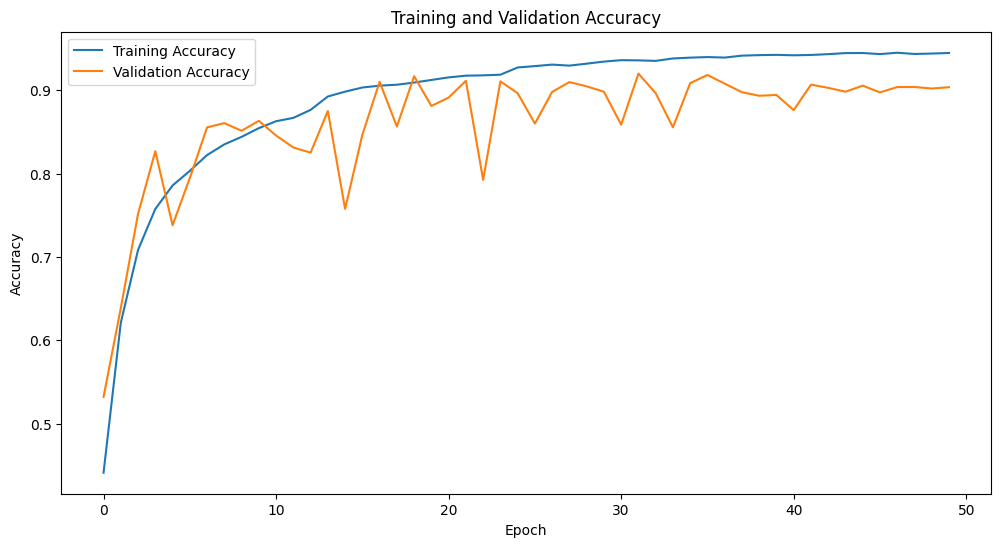

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [46]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Add, Multiply, Concatenate, Reshape, Lambda,
    GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import register_keras_serializable


In [47]:
@register_keras_serializable()
class CBAM(tf.keras.layers.Layer):
    def __init__(self, reduction_ratio=16, **kwargs):
        super(CBAM, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channel = input_shape[-1]

        # Channel Attention components
        self.shared_dense_one = Dense(channel // self.reduction_ratio,
                                      activation='relu',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')
        self.shared_dense_two = Dense(channel,
                                      activation='sigmoid',
                                      kernel_initializer='he_normal',
                                      use_bias=True,
                                      bias_initializer='zeros')

        # Spatial Attention components
        self.conv_spatial = Conv2D(filters=1,
                                   kernel_size=7,
                                   strides=1,
                                   padding='same',
                                   activation='sigmoid',
                                   kernel_initializer='he_normal',
                                   use_bias=False)
        super(CBAM, self).build(input_shape)

    def call(self, inputs):
        # ----- Channel Attention -----
        # Average Pooling
        channel_avg = GlobalAveragePooling2D()(inputs)
        channel_avg = Reshape((1, 1, inputs.shape[-1]))(channel_avg)

        # Max Pooling
        channel_max = GlobalMaxPooling2D()(inputs)
        channel_max = Reshape((1, 1, inputs.shape[-1]))(channel_max)

        # Shared MLP Network
        avg_out = self.shared_dense_two(self.shared_dense_one(channel_avg))
        max_out = self.shared_dense_two(self.shared_dense_one(channel_max))

        # Combined Channel Attention
        channel_attention = Add()([avg_out, max_out])
        channel_attention = Multiply()([inputs, channel_attention])

        # ----- Spatial Attention -----
        # Average Pooling across channels
        spatial_avg = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(channel_attention)

        # Max Pooling across channels
        spatial_max = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(channel_attention)

        # Concatenate
        spatial_concat = Concatenate(axis=3)([spatial_avg, spatial_max])

        # Spatial Attention
        spatial_attention = self.conv_spatial(spatial_concat)
        spatial_attention = Multiply()([channel_attention, spatial_attention])

        # ----- Residual Connection -----
        output = Add()([spatial_attention, inputs])

        return output

    def get_config(self):
        config = super(CBAM, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config


In [48]:
# Define paths to your datasets
real_data_path = '/content/drive/MyDrive/Skin HAM10000/hmnist_28_28_RGB.csv'  # Update this path
synthetic_data_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/synthetic_images_pixel_values.csv'  # Update this path

# Load datasets
real_df = pd.read_csv(real_data_path)
synthetic_df = pd.read_csv(synthetic_data_path)

# Combine datasets
data = pd.concat([real_df, synthetic_df], ignore_index=True)

# Separate labels and features
Label = data["label"]
Data = data.drop(columns=["label"])

# Convert to NumPy arrays and reshape
# Assuming each row represents a flattened 28x28 RGB image
Data = Data.values.reshape(-1, 28, 28, 3).astype('float32') / 255.0  # Normalize to [0, 1]

# Encode labels to integers
le = LabelEncoder()
Label_encoded = le.fit_transform(Label)

# One-hot encode labels
y = to_categorical(Label_encoded, num_classes=7)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Data, y, test_size=0.25, random_state=49, stratify=Label_encoded
)

# Print to verify shapes
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Define class mapping (ensure consistency with labels in your dataset)
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'Basal cell carcinoma'),
    2: ('bkl', 'Benign keratosis-like lesions'),
    3: ('df', 'Dermatofibroma'),
    4: ('nv', 'Melanocytic nevi'),
    5: ('vasc', 'Pyogenic granulomas and hemorrhage'),
    6: ('mel', 'Melanoma')
}


Training set shape: (35100, 28, 28, 3), Training labels shape: (35100, 7)
Testing set shape: (11701, 28, 28, 3), Testing labels shape: (11701, 7)


In [49]:
# Define the input shape and number of classes
input_shape = (28, 28, 3)
num_classes = y_train.shape[1]  # Number of classes

# Input Layer
inputs = Input(shape=input_shape, name='input_layer')

# Convolutional Block 1
x = Conv2D(32, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_1')(inputs)
x = MaxPooling2D(name='max_pooling2d_1')(x)
x = BatchNormalization(name='batch_normalization_1')(x)

# Convolutional Block 2
x = Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_2')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_3')(x)
x = MaxPooling2D(name='max_pooling2d_2')(x)
x = BatchNormalization(name='batch_normalization_2')(x)

# Convolutional Block 3
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_4')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_5')(x)
x = MaxPooling2D(name='max_pooling2d_3')(x)
x = BatchNormalization(name='batch_normalization_3')(x)

# Convolutional Block 4
x = Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_6')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same',
           kernel_initializer='he_normal', name='conv2d_7')(x)
x = MaxPooling2D(name='max_pooling2d_4')(x)

# Integrate CBAM after the last convolutional block
x = CBAM(name='cbam_1')(x)

# Flatten and Dense Layers
x = Flatten(name='flatten_1')(x)
x = Dropout(rate=0.2, name='dropout_1')(x)
x = Dense(units=256, activation='relu',
          kernel_initializer='he_normal', name='dense_1')(x)
x = BatchNormalization(name='batch_normalization_4')(x)

x = Dense(units=128, activation='relu',
          kernel_initializer='he_normal', name='dense_2')(x)
x = BatchNormalization(name='batch_normalization_5')(x)

x = Dense(units=64, activation='relu',
          kernel_initializer='he_normal', name='dense_3')(x)
x = BatchNormalization(name='batch_normalization_6')(x)

x = Dense(units=32, activation='relu',
          kernel_initializer='he_normal',
          kernel_regularizer=L1L2(), name='dense_4')(x)
x = BatchNormalization(name='batch_normalization_7')(x)

# Output Layer
outputs = Dense(units=num_classes, activation='softmax',
               kernel_initializer='glorot_uniform', name='classifier')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs, name='CBAM_Functional_Model')

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "CBAM_Functional_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cbam_1 (CBAM)                        │ (None, 1, 1, 256)           │           8,562 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,0

 Total params: 1,283,641 (4.90 MB)

 Trainable params: 1,282,233 (4.89 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [51]:
# Define callbacks for model checkpointing, learning rate reduction, and TensorBoard
checkpoint_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/final.keras'  # Update this path as needed

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir="logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1
)

# Combine all callbacks (EarlyStopping removed)
callbacks = [checkpoint, reduce_lr, tensorboard]

# Define ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=100,  # Adjust the number of epochs as needed
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
1095/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3581 - loss: 1.6851
Epoch 1: val_accuracy improved from -inf to 0.60140, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/final.keras
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 59s 53ms/step - accuracy: 0.3583 - loss: 1.6844 - val_accuracy: 0.6014 - val_loss: 1.0476 - learning_rate: 0.0010
Epoch 2/100
1095/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5942 - loss: 1.0607
Epoch 2: val_accuracy improved from 0.60140 to 0.70302, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/final.keras
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.5943 - loss: 1.0605 - val_accuracy: 0.7030 - val_loss: 0.8093 - learning_rate: 0.0010
Epoch 3/100
1095/1097 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7023 - loss: 0.7894
Epoch 3: val_accuracy improved from 0.70302 to 0.77882, saving model to /content/drive/MyDrive/Skin HAM10000/omar_gan/output/final.keras
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4

In [52]:
# Save the entire model
model.save('/content/drive/MyDrive/Skin HAM10000/omar_gan/output/final__cbam.keras')
print("Model saved successfully.")


Model saved successfully.


In [53]:
# Load the best saved model with custom_objects
loaded_model = load_model(
    checkpoint_path,
    custom_objects={'CBAM': CBAM}
)
print("Model loaded successfully.")

# Evaluate on training data
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")

print('-' * 30)

# Evaluate on testing data
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# Initialize the loaded model by passing real data
real_data_batch = X_train[:10]  # Using the first 10 samples from training data
_ = loaded_model.predict(real_data_batch, verbose=1)
print("Model initialized with a real input batch.")


Model loaded successfully.
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9348 - loss: 0.1731
Train Loss: 0.1721
Train Accuracy: 93.50%
------------------------------
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9163 - loss: 0.2309
Test Loss: 0.2367
Test Accuracy: 91.45%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Model initialized with a real input batch.


In [54]:
# Verify layer names to ensure correct selection for feature extraction
for layer in loaded_model.layers:
    print(layer.name)

# Create the feature extraction model up to 'flatten_1' layer
feature_extraction_layer = Model(inputs=loaded_model.input, outputs=loaded_model.get_layer('flatten_1').output)
print("Feature extraction model created successfully.")


input_layer
conv2d_1
max_pooling2d_1
batch_normalization_1
conv2d_2
conv2d_3
max_pooling2d_2
batch_normalization_2
conv2d_4
conv2d_5
max_pooling2d_3
batch_normalization_3
conv2d_6
conv2d_7
max_pooling2d_4
cbam_1
flatten_1
dropout_1
dense_1
batch_normalization_4
dense_2
batch_normalization_5
dense_3
batch_normalization_6
dense_4
batch_normalization_7
classifier
Feature extraction model created successfully.


In [55]:
print("Extracting features from training data...")
X_train_features = feature_extraction_layer.predict(X_train, verbose=1)
print("Extracting features from testing data...")
X_test_features = feature_extraction_layer.predict(X_test, verbose=1)

# Print feature shapes to verify
print(f"Shape of extracted training features: {X_train_features.shape}")
print(f"Shape of extracted testing features: {X_test_features.shape}")


Extracting features from training data...
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Extracting features from testing data...
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Shape of extracted training features: (35100, 256)
Shape of extracted testing features: (11701, 256)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training features
print("Training Random Forest classifier...")
rf_classifier.fit(X_train_features, y_train_int)
print("Random Forest classifier trained successfully.")

# Make predictions on the test set
print("Making predictions with Random Forest classifier...")
y_pred_rf = rf_classifier.predict(X_test_features)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_int, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf*100:.2f}%")

# Generate classification report
report_rf = classification_report(
    y_test_int, y_pred_rf,
    target_names=[classes[i][1] for i in sorted(classes)]
)
print("Random Forest Classification Report:\n", report_rf)


Training Random Forest classifier...
Random Forest classifier trained successfully.
Making predictions with Random Forest classifier...
Random Forest Classifier Accuracy: 93.16%
Random Forest Classification Report:
                                                   precision    recall  f1-score   support

Actinic keratoses and intraepithelial carcinomae       0.94      0.93      0.93      1677
                            Basal cell carcinoma       0.96      0.96      0.96      1676
                   Benign keratosis-like lesions       0.90      0.87      0.89      1677
                                  Dermatofibroma       0.97      0.98      0.97      1676
                                Melanocytic nevi       0.85      0.93      0.89      1676
              Pyogenic granulomas and hemorrhage       0.98      0.96      0.97      1676
                                        Melanoma       0.94      0.89      0.91      1643

                                        accuracy              

In [57]:
import joblib

rf_model_path = '/content/drive/MyDrive/Skin HAM10000/omar_gan/output/rf_final.joblib'
joblib.dump(rf_classifier, rf_model_path)
print(f"Random Forest model saved successfully at {rf_model_path}")


Random Forest model saved successfully at /content/drive/MyDrive/Skin HAM10000/omar_gan/output/rf_final.joblib


Random Forest Predicted Class: Melanocytic nevi
True Class: Melanocytic nevi


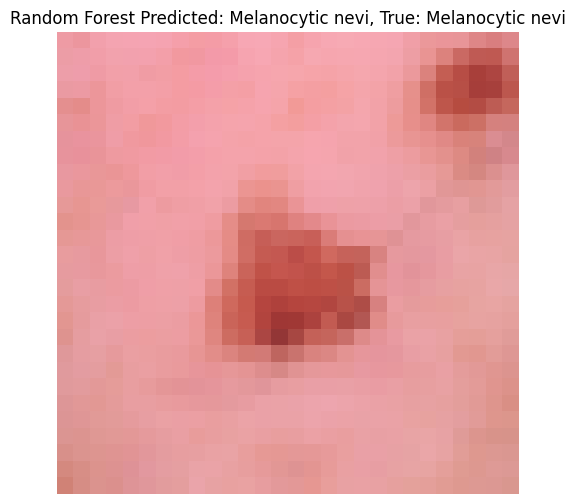

In [58]:
import matplotlib.pyplot as plt

# Choose an index to visualize
index = 0  # Change as needed

# Extract the feature for the selected test image
test_image_feature = X_test_features[index].reshape(1, -1)
test_label_int = y_test_int[index]

# Make a prediction using Random Forest
predicted_class_rf = rf_classifier.predict(test_image_feature)[0]

# Print the predicted and true class
print(f"Random Forest Predicted Class: {classes[predicted_class_rf][1]}")
print(f"True Class: {classes[test_label_int][1]}")

# Display the image with predicted and true labels
plt.figure(figsize=(6,6))
plt.imshow(X_test[index])
plt.title(f"Random Forest Predicted: {classes[predicted_class_rf][1]}, True: {classes[test_label_int][1]}")
plt.axis('off')
plt.show()
